In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amplitude = 1e4 # ADU
times = np.arange(0, 10, 0.02)
P_EB = 1 # day
vertical_offset = 3e4
f_raw = amplitude * np.cos(times*2*np.pi/P_EB) + vertical_offset

f_rel = np.ones_like(f_raw)
P_CBP = 2.141 # days
T_dur = 0.3 # days
depth = 0.2 # relative flux
t_0 = 0.5 # epoch (at beginning of transit)

def in_transit(t, P_CBP, t_0, T_dur):
    if np.mod(t, P_CBP) > t_0 and np.mod(t, P_CBP) < t_0 + T_dur:
        return True
    else:
        return False

for ix, t in enumerate(times):
    if in_transit(t, P_CBP, t_0, T_dur):
        f_rel[ix] -= depth
    else:
        continue

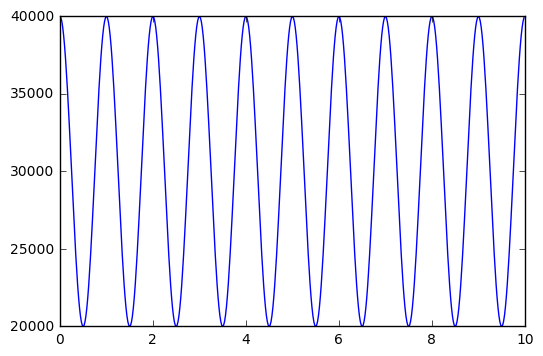

In [3]:
%matplotlib inline
f, ax = plt.subplots()
ax.plot(times, f_raw);

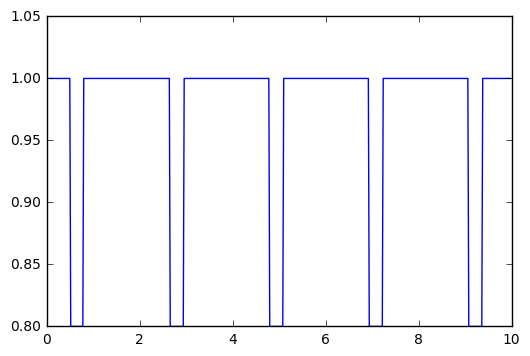

In [4]:
f, ax = plt.subplots()
ax.plot(times, f_rel);

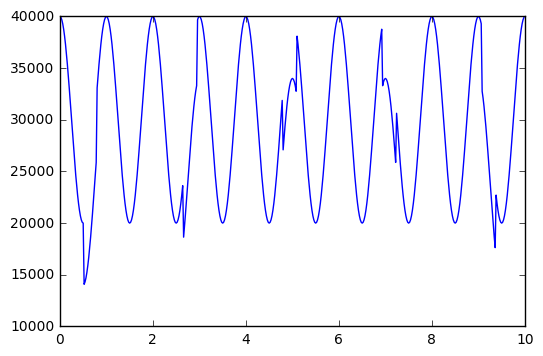

In [5]:
f, ax = plt.subplots()
ax.plot(times, f_raw + (f_rel - 1)*np.median(f_raw));

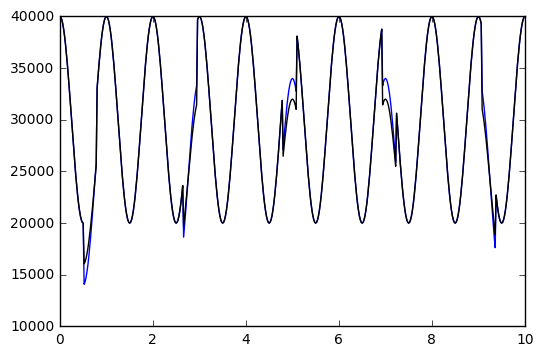

In [6]:
f, ax = plt.subplots()
ax.plot(times, f_raw + (f_rel - 1)*np.median(f_raw), 'b-')
ax.plot(times, f_raw + (f_rel - 1)*f_raw, 'k-');

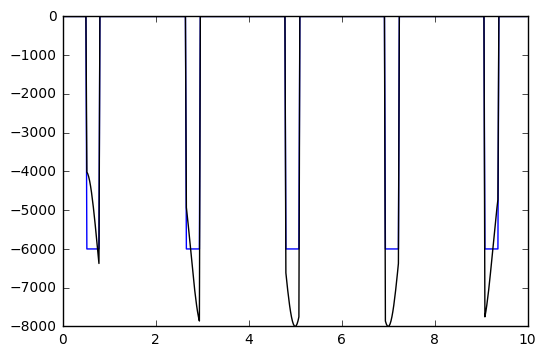

In [12]:
f, ax = plt.subplots()
ax.plot(times, (f_rel - 1)*np.median(f_raw), 'b-')
ax.plot(times, (f_rel - 1)*f_raw, 'k-');

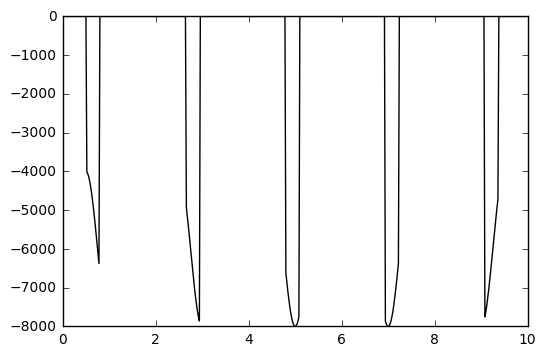

In [14]:
f, ax = plt.subplots()
ax.plot(times, f_rel*f_raw - f_raw, 'k-');